<a href="https://colab.research.google.com/github/yayunl/colab-code/blob/main/Reuters_multiclassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import reuters


**Load the Reuters dataset**

In [2]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2110848/2110848 [==============================] - 0s 0us/step


In [3]:
len(train_data)

8982

In [4]:
len(test_data)

2246

In [7]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [8]:
decoded_review
#

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [9]:
train_labels[10]

3

**Prepare the data**

In [10]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    # Set specific indices of results[i] to 1s
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [13]:
# One-hot encoding the labels
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)
# Alternatively,
# from keras.utils.np_utils import to_categorical
# one_hot_train_labels = to_categorical(train_labels)
# one_hot_test_labels = to_categorical(test_labels)

**Build the network**

In [22]:
from keras import models
from keras import layers

input_dim = x_train[0].shape[0]
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [23]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [27]:
# Create validation data
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [37]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=10,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/10
16/16 [==============================] - 2s 98ms/step - loss: 0.1298 - accuracy: 0.9567 - val_loss: 0.9982 - val_accuracy: 0.8000
Epoch 2/10
16/16 [==============================] - 1s 45ms/step - loss: 0.1278 - accuracy: 0.9564 - val_loss: 0.9777 - val_accuracy: 0.8070
Epoch 3/10
16/16 [==============================] - 1s 45ms/step - loss: 0.1209 - accuracy: 0.9590 - val_loss: 0.9627 - val_accuracy: 0.8170
Epoch 4/10
16/16 [==============================] - 1s 44ms/step - loss: 0.1166 - accuracy: 0.9578 - val_loss: 1.0089 - val_accuracy: 0.7980
Epoch 5/10
16/16 [==============================] - 1s 55ms/step - loss: 0.1159 - accuracy: 0.9578 - val_loss: 0.9963 - val_accuracy: 0.8100
Epoch 6/10
16/16 [==============================] - 1s 74ms/step - loss: 0.1140 - accuracy: 0.9578 - val_loss: 1.0030 - val_accuracy: 0.8120
Epoch 7/10
16/16 [==============================] - 1s 79ms/step - loss: 0.1077 - accuracy: 0.9590 - val_loss: 1.0078 - val_accuracy: 0.8080
Epoch 8/10
16

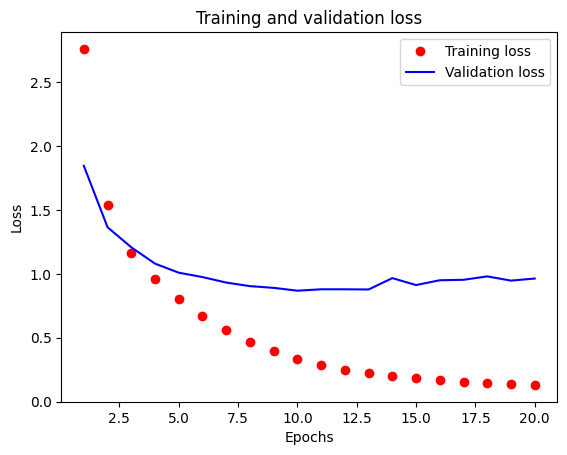

In [31]:
# Plot the loss and accuracy
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

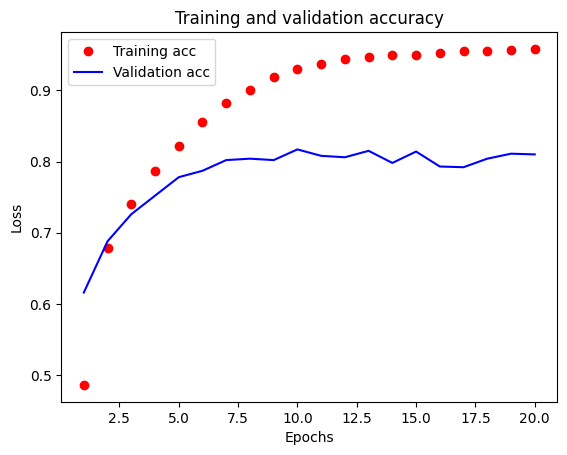

In [36]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

**Generating predictions**

In [38]:
predictions = model.predict(x_test)

71/71 [==============================] - 1s 7ms/step


In [39]:
predictions[0].shape

(46,)

In [40]:
# The largest entry is the predicted class
np.argmax(predictions[0])

3

**Summary**  

Here’s what you should take away from this example:
1. If you’re trying to classify data points among N classes, your network should end
with a Dense layer of size N (dim_of_previous_layer, N).
2. In a single-label, multiclass classification problem, your network should end
with a *softmax* activation so that it will output a probability distribution over the
N output classes.
3. *Categorical crossentropy* is almost always the loss function you should use for
such problems. It minimizes the distance between the probability distributions
output by the network and the true distribution of the targets.
4. There are two ways to handle labels in multiclass classification:

   *    Encoding the labels via categorical encoding (also known as one-hot encoding) and using *categorical_crossentropy* as a loss function
   *   Encoding the labels as integers and using the *sparse_categorical_crossentropy*
loss function
5. If you need to classify data into a large number of categories, you should avoid
creating information bottlenecks in your network due to intermediate layers
that are too small.